# GOAL
The goal of this challenge is:

1.discover the story behind the data.

2.EDA

# Challenge Description

• Data anomaly?

• What more information would you require to drive more insights from this dataset?


# Data

In [1]:

# ignore the warnings

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline


In [1]:

# 1. Data Loading and Initial Inspection
def load_and_inspect_data(filepath):
    try:
        df = pd.read_csv(filepath)  # Or other appropriate loading function
        print("Data loaded successfully.")
        print(df.columns)
        print(df.head())  # Display first few rows
        print(df.info())  # Check data types and missing values
        print(df.describe()) # Summary statistics for numerical columns
        print(df.isnull().sum())
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None

In [7]:
filepath = "usage_data.csv"  # Replace with your file path
#label_column = "your_label_column"  # Replace with your label column name

df = load_and_inspect_data(filepath)

Data loaded successfully.
Index(['Date', 'Username', 'Feature', 'Sessions', 'Time spent',
       'Average time spent'],
      dtype='object')
         Date Username        Feature  Sessions  Time spent  \
0  2017-06-01  kwalter      Reporting        14        23.0   
1  2017-06-01    kcarr        Roadmap        17        55.0   
2  2017-06-01  cstuart     Automation        13         2.0   
3  2017-06-01  mkelley  Task Creation        14        18.0   
4  2017-06-02  edillon  Task Creation        17        13.0   

   Average time spent  
0            1.642857  
1            3.235294  
2            0.153846  
3            1.285714  
4            0.764706  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10575 entries, 0 to 10574
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10575 non-null  object 
 1   Username            10575 non-null  object 
 2   Feature             10575 

In [5]:
print(df.columns)
print(df.head())  # Display first few rows
print(df.info())  # Check data types and missing values
print(df.describe()) # Summary statistics for numerical columns
print(df.isnull().sum())

Index(['Date', 'Username', 'Feature', 'Sessions', 'Time spent',
       'Average time spent'],
      dtype='object')
         Date Username        Feature  Sessions  Time spent  \
0  2017-06-01  kwalter      Reporting        14        23.0   
1  2017-06-01    kcarr        Roadmap        17        55.0   
2  2017-06-01  cstuart     Automation        13         2.0   
3  2017-06-01  mkelley  Task Creation        14        18.0   
4  2017-06-02  edillon  Task Creation        17        13.0   

   Average time spent  
0            1.642857  
1            3.235294  
2            0.153846  
3            1.285714  
4            0.764706  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10575 entries, 0 to 10574
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10575 non-null  object 
 1   Username            10575 non-null  object 
 2   Feature             10575 non-null  object 
 3   Ses

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert purchase_time to datetime format
df['Date'] = pd.to_datetime(df['Date'])




In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract year and month
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# Sum usage by year and month
usage_summary = df.groupby(['year', 'month'])['Time spent'].sum().reset_index()

# Display the summarized usage data
print(usage_summary)

# trends = df.groupby(['source', df['purchase_time'].dt.to_period('D')])['purchase_value'].sum().unstack(level=0)


    year  month  Time spent
0   2017      6      3519.0
1   2017      7      3916.0
2   2017      8      3462.0
3   2017      9      3691.0
4   2017     10      3609.0
..   ...    ...         ...
63  2022      9      2970.0
64  2022     10      3242.0
65  2022     11      2982.0
66  2022     12      3198.0
67  2023      1      3146.0

[68 rows x 3 columns]


C:\Users\wenfe\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


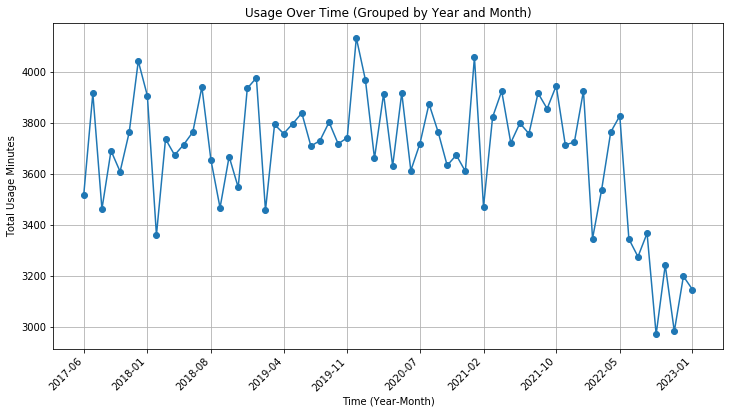

In [12]:
# Create a time-series plot of usage over time (grouped by year and month)
import numpy as np
plt.figure(figsize=(12, 6))
plt.plot(usage_summary.index, usage_summary['Time spent'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Usage Minutes")
plt.title("Usage Over Time (Grouped by Year and Month)")

# Reduce x-tick labels to avoid overlap
num_ticks = min(10, len(usage_summary))  # Adjust dynamically based on data size
tick_positions = np.linspace(0, len(usage_summary) - 1, num_ticks, dtype=int)
tick_labels = [f"{y}-{m:02d}" for y, m in zip(usage_summary['year'], usage_summary['month'])]
plt.xticks(tick_positions, np.array(tick_labels)[tick_positions], rotation=45, ha='right')

plt.grid()

# Show the plot
plt.show()

There is a noticeable decline in the data. We need to analyze it further.

In [20]:
filtered_df = df[(df['year'] > 2022) | ((df['year'] == 2022) & (df['month'] > 3))]

print(filtered_df)
usage_summary_filtered = df.groupby(['year', 'month'])['Time spent'].sum().reset_index()

            Date     Username            Feature  Sessions  Time spent  \
9003  2022-04-01    nphillips      Task Creation        16        27.0   
9004  2022-04-01        swise      Saga Creation        16        35.0   
9005  2022-04-01       ahanna            Roadmap        15        56.0   
9006  2022-04-01      dbenton  Account Managment        16        16.0   
9007  2022-04-01      dbriggs          Reporting        16        34.0   
...          ...          ...                ...       ...         ...   
10570 2023-01-31        swise  Account Managment        15        15.0   
10571 2023-01-31  cvillarreal         Automation        15         6.0   
10572 2023-01-31      slarson      Task Creation        16        13.0   
10573 2023-01-31        dhays            Roadmap        16        29.0   
10574 2023-01-31       kreese          Reporting        13        31.0   

       Average time spent  year  month  
9003             1.687500  2022      4  
9004             2.187500  20

C:\Users\wenfe\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


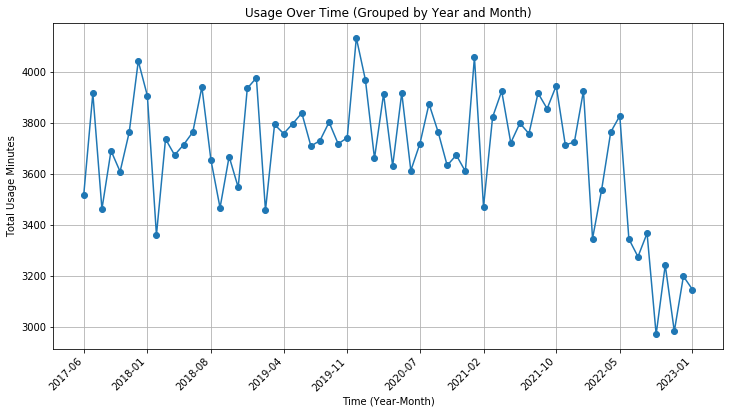

In [21]:
# Create a time-series plot of usage over time (grouped by year and month)
import numpy as np
plt.figure(figsize=(12, 6))
plt.plot(usage_summary_filtered.index, usage_summary_filtered['Time spent'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Usage Minutes")
plt.title("Usage Over Time (Grouped by Year and Month)")

# Reduce x-tick labels to avoid overlap
num_ticks = min(10, len(usage_summary_filtered))  # Adjust dynamically based on data size
tick_positions = np.linspace(0, len(usage_summary_filtered) - 1, num_ticks, dtype=int)
tick_labels = [f"{y}-{m:02d}" for y, m in zip(usage_summary_filtered['year'], usage_summary_filtered['month'])]
plt.xticks(tick_positions, np.array(tick_labels)[tick_positions], rotation=45, ha='right')

plt.grid()

# Show the plot
plt.show()

C:\Users\wenfe\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


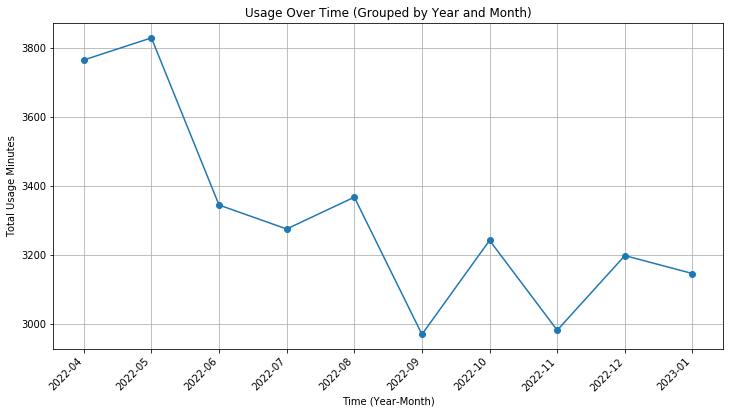

In [23]:
 
filtered_df = df[(df['year'] > 2022) | ((df['year'] == 2022) & (df['month'] > 3))]

# NOW, group and summarize the FILTERED data
usage_summary_filtered = filtered_df.groupby(['year', 'month'])['Time spent'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(usage_summary_filtered.index, usage_summary_filtered['Time spent'], marker='o', linestyle='-')

# Formatting the plot (same as before)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Usage Minutes")
plt.title("Usage Over Time (Grouped by Year and Month)")

num_ticks = min(10, len(usage_summary_filtered))
tick_positions = np.linspace(0, len(usage_summary_filtered) - 1, num_ticks, dtype=int)
tick_labels = [f"{y}-{m:02d}" for y, m in zip(usage_summary_filtered['year'], usage_summary_filtered['month'])]
plt.xticks(tick_positions, np.array(tick_labels)[tick_positions], rotation=45, ha='right')

plt.grid()
plt.show()

In [25]:
df_6 = df[df['month'] == 6]
grouped6 = df_6.groupby(["year", "month", "Feature"])["Time spent"].sum().reset_index()
grouped6

,year,month,Feature,Time spent
0,2017,6,Account Managment,381.000000
1,2017,6,Automation,254.000000
2,2017,6,Reporting,679.000000
3,2017,6,Roadmap,1158.000000
4,2017,6,Saga Creation,550.000000
5,2017,6,Task Creation,497.000000
6,2018,6,Account Managment,398.000000
7,2018,6,Automation,258.000000
8,2018,6,Reporting,671.000000
9,2018,6,Roadmap,1271.000000


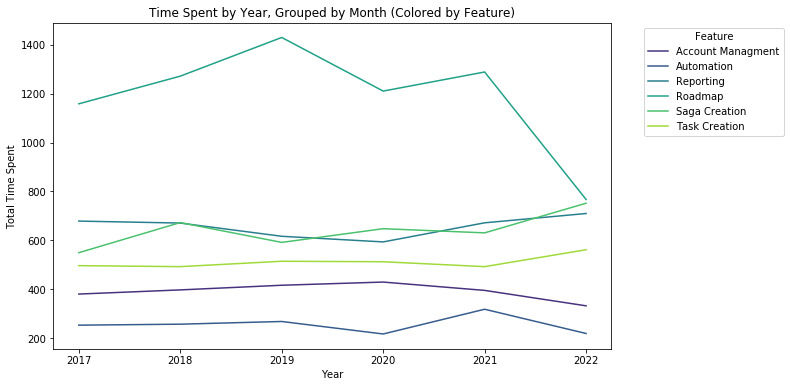

In [26]:
#sns lineplot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Use "hue" for Feature and group bars by Month
sns.lineplot(
    x="year",
    y="Time spent",
    hue="Feature",
    data=grouped6,
    palette="viridis",
    ci=None,  # Disable confidence intervals
)

plt.title("Time Spent by Year, Grouped by Month (Colored by Feature)")
plt.xlabel("Year")
plt.ylabel("Total Time Spent")
plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [38]:
df_6

,Date,Username,Feature,Sessions,Time spent,Average time spent,year,month
0,2017-06-01,kwalter,Reporting,14,23.0,1.642857,2017,6
1,2017-06-01,kcarr,Roadmap,17,55.0,3.235294,2017,6
2,2017-06-01,cstuart,Automation,13,2.0,0.153846,2017,6
3,2017-06-01,mkelley,Task Creation,14,18.0,1.285714,2017,6
4,2017-06-02,edillon,Task Creation,17,13.0,0.764706,2017,6
...,...,...,...,...,...,...,...,...
9463,2022-06-30,jbeasley,Task Creation,15,12.0,0.800000,2022,6
9464,2022-06-30,sfox,Account Managment,16,14.0,0.875000,2022,6
9465,2022-06-30,mgonzalez,Saga Creation,14,21.0,1.500000,2022,6
9466,2022-06-30,ehodges,Reporting,14,27.0,1.928571,2022,6


In [39]:
# Create a pivot table with years as columns, features as rows, and sum of Time spent as values
pivot_table_6 = df_6.pivot_table(index='Feature', columns='year', values='Time spent', aggfunc='sum', fill_value=0)

# Reset index for display purposes
pivot_table_6.reset_index(inplace=True)

# Display the pivot table
print(pivot_table_6)

year            Feature  2017  2018  2019  2020  2021        2022
0     Account Managment   381   398   417   430   396  333.000000
1            Automation   254   258   269   218   319  220.000000
2             Reporting   679   671   617   594   672  710.000000
3               Roadmap  1158  1271  1429  1210  1288  767.333333
4         Saga Creation   550   673   592   648   631  752.000000
5         Task Creation   497   493   515   513   493  562.000000


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for January (month=1)
df_january = df[df['month'] == 1]

# Create a pivot table with years as columns, features as rows, and sum of Time spent as values
pivot_table = df_january.pivot_table(index='Feature', columns='year', values='Time spent', aggfunc='sum', fill_value=0)

# Reset index for display purposes
pivot_table.reset_index(inplace=True)

# Display the pivot table
print(pivot_table)

year            Feature  2018  2019  2020  2021  2022  2023
0     Account Managment   405   455   451   435   458   354
1            Automation   287   307   313   288   253   233
2             Reporting   676   680   671   614   705   605
3               Roadmap  1285  1370  1295  1509  1291   716
4         Saga Creation   652   675   751   647   703   670
5         Task Creation   602   490   488   565   516   568


In [15]:
# Group by Year, Month, and Feature, then sum Time Spent
grouped1 = df_january.groupby(["year", "month", "Feature"])["Time spent"].sum().reset_index()
grouped1

,year,month,Feature,Time spent
0,2018,1,Account Managment,405.0
1,2018,1,Automation,287.0
2,2018,1,Reporting,676.0
3,2018,1,Roadmap,1285.0
4,2018,1,Saga Creation,652.0
5,2018,1,Task Creation,602.0
6,2019,1,Account Managment,455.0
7,2019,1,Automation,307.0
8,2019,1,Reporting,680.0
9,2019,1,Roadmap,1370.0


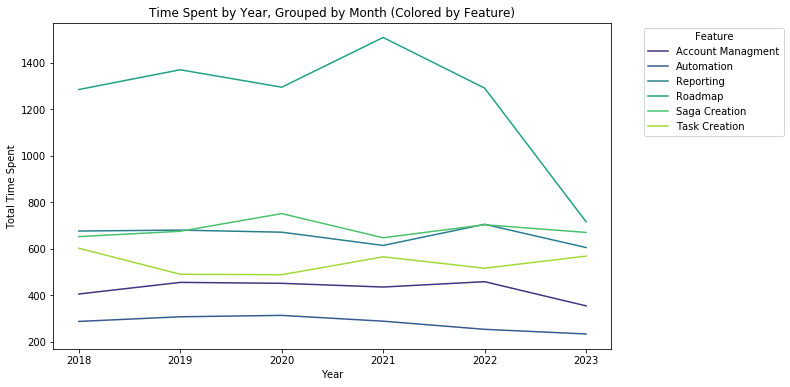

In [16]:
#sns lineplot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Use "hue" for Feature and group bars by Month
sns.lineplot(
    x="year",
    y="Time spent",
    hue="Feature",
    data=grouped1,
    palette="viridis",
    ci=None,  # Disable confidence intervals
)

plt.title("Time Spent by Year, Grouped by Month (Colored by Feature)")
plt.xlabel("Year")
plt.ylabel("Total Time Spent")
plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Takeaway:
Starting June 1, 2022, a sharp decline is evident in the feature roadmap.  Further investigation is required to understand the underlying causes of this drop.